<p style="color: green; font-size: 40px; font-weight: bold;">
    Machine Learning Models
</p>

![Sample Image](ml.webp)

#### Import Necessary libraries

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Read and analyze the data

In [53]:
df = pd.read_excel("data.xlsx")

In [54]:
# Define features (X) and target (y)
X = df[df.columns[1:]]
y = df[df.columns[0]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='linear')
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        "Model": model_name,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R2 Score": r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

                    Model  Mean Squared Error  Mean Absolute Error   R2 Score
0       Linear Regression        1.814680e+04           123.867917   0.694573
1           Decision Tree        1.647083e+04            97.500000   0.722781
2           Random Forest        1.467864e+04            96.220000   0.752945
3  Support Vector Machine        2.681665e+06          1034.337080 -44.134802


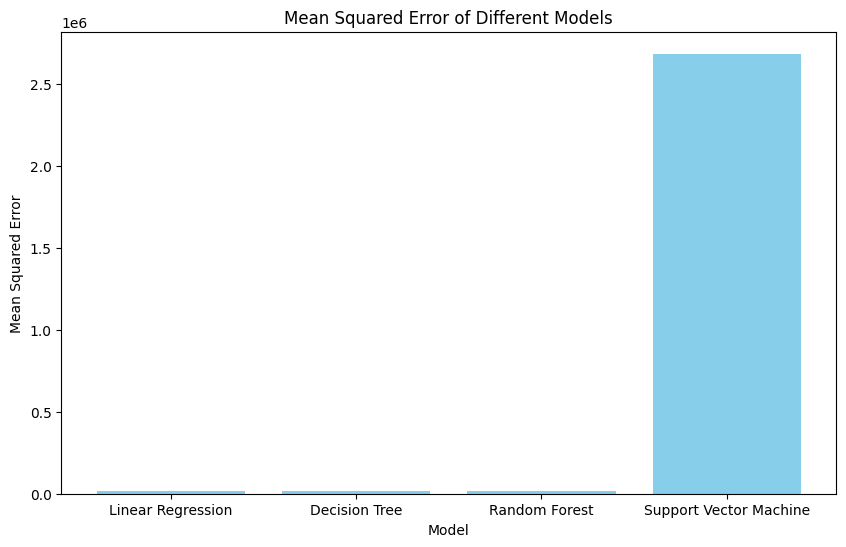

In [55]:
# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Mean Squared Error'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.show()

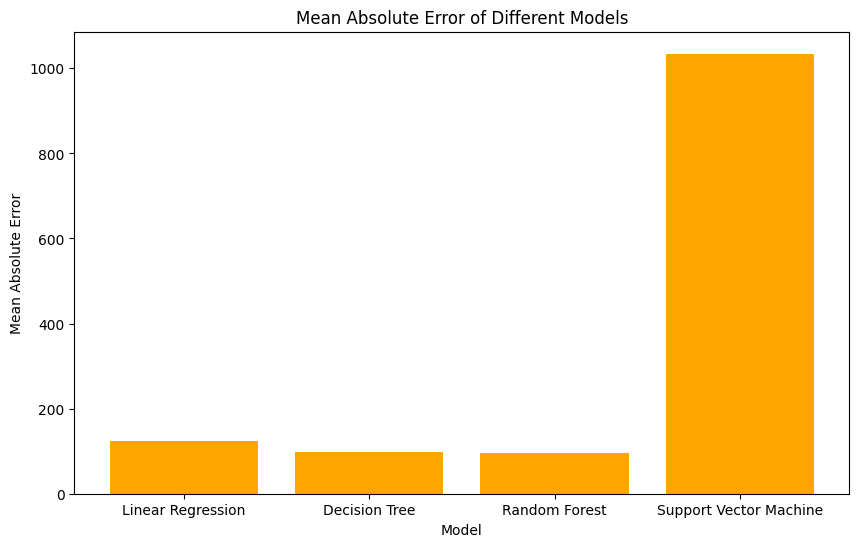

In [56]:
# Plot Mean Absolute Error
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Mean Absolute Error'], color='orange')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Different Models')
plt.show()


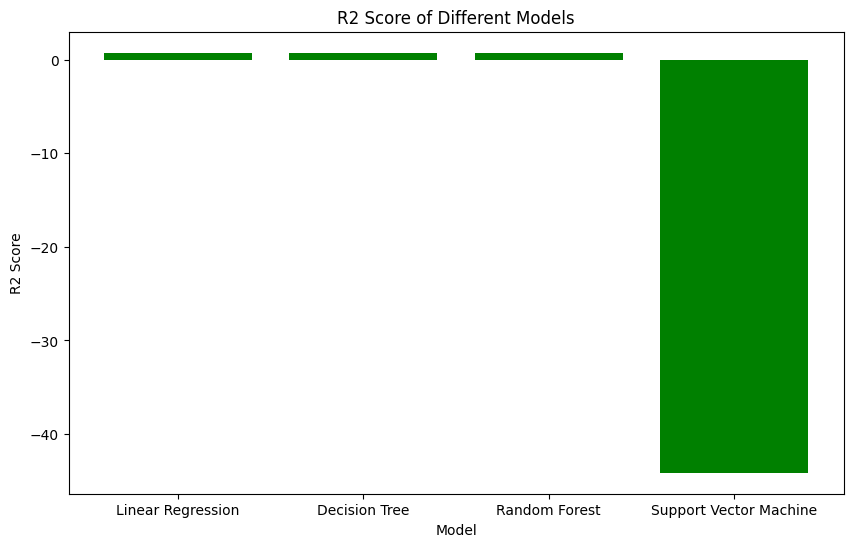

In [60]:
# Plot R2 Score
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2 Score'], color='green')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score of Different Models')
plt.show()

In [62]:
# I have decided Random Forest model for this project
example_x = X_test.iloc[0]
example_x_df = pd.DataFrame([example_x], columns=X.columns)
# Use the trained Random Forest model to predict the target variable for the example input
random_forest_model = models["Random Forest"]
predicted_y = random_forest_model.predict(example_x_df)

print(f"The original value for the given example is: {y_test.iloc[0]}")
print(f"The predicted value for the given example is: {predicted_y[0]}")

The original value for the given example is: 1300
The predicted value for the given example is: 1390.26
